# Table of Contents
- [Basic Morisita](#basic-morisita): unigram, bigram, trigram child-adult per-session Morisita calculation.
## Per-Child plots
A single plot for each child.
- [Per-Child Unigrams Plots](#per-child-unigram)
- [Per-Child Bigram Plots](#per-child-bigram)
- [Per-Child Trigram Plots](#per-child-trigram)
## Excluding Zero-count Ngrams
When doing the Morisita analysis for a single child-adult session, 
dropping all ngrams that were not produced by both speakers in that session.
- [Excluding Zero-count Ngrams](#zero-count-ngrams)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataset import get_manchester

In [94]:
def morisita(a, b, drop_zeros=False, randomize=False):
    if randomize:
        b.index = np.random.permutation(b.index)
    if drop_zeros:
        df = pd.DataFrame({'a': a, 'b': b}).dropna(how='any')
        a, b = df.a, df.b
    else:
        a, b = a.align(b, fill_value=0)
    a = a / a.sum()
    b = b / b.sum()
    numer = np.dot(a, b)
    denom = np.square(a).sum() + np.square(b).sum()
    return 2 * numer / denom

def morisita_child_adult(df, drop_zeros=False):
    child = df[df.speaker.eq('CHI')].ngram.value_counts()
    adult = df[df.speaker.eq('MOT')].ngram.value_counts()
    return morisita(child, adult, drop_zeros=drop_zeros)

def morisita_adult_adult(df, corpus1, corpus2):
    adult1 = df[df.speaker.eq('MOT') & df.corpus.eq(corpus1)].ngram.value_counts()
    adult2 = df[df.speaker.eq('MOT') & df.corpus.eq(corpus2)].ngram.value_counts()
    return morisita(adult1, adult2)

In [5]:
def per_session_plot(title):
    plt.grid()
    plt.xticks(np.arange(1,35))
    plt.title(title)
    plt.legend()
    plt.show()

# Quick Test 

Testing example from "Testing for Significance of Morisita's, Horn's and Related Measures of Overlap"

The morisita calculation for X and Y should be 0.83

In [62]:
x = pd.Series([.2, .3, .5])
y = pd.Series([.1, .6, .3])
morisita(x, y)

0.83333333333333326

In [ ]:
unigrams, bigrams, trigrams = get_manchester("/home/paul/corpora/Manchester/**/*", 
                                            cached=True, 
                                            gram_sizes=[1, 2, 3])

<a id='basic-morisita'></a>
# Basic Child-Adult Morisita comparison

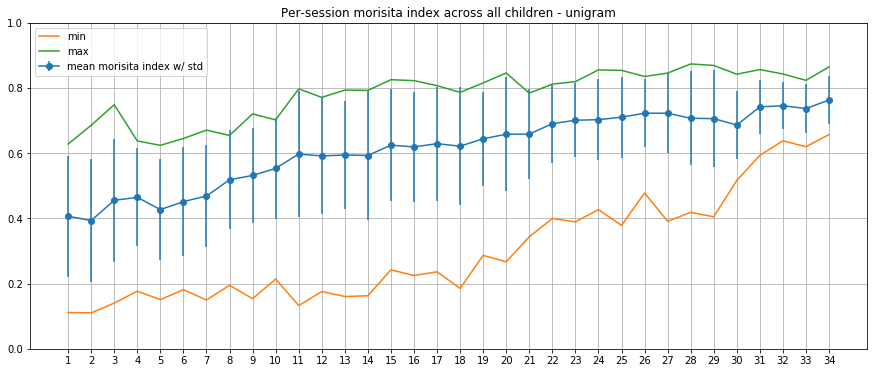

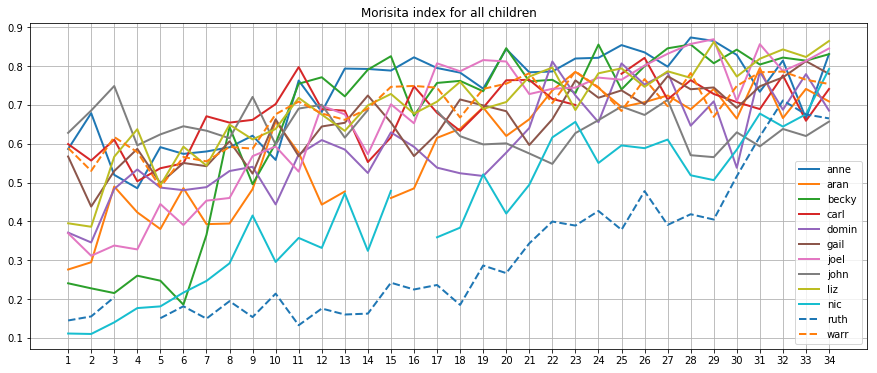

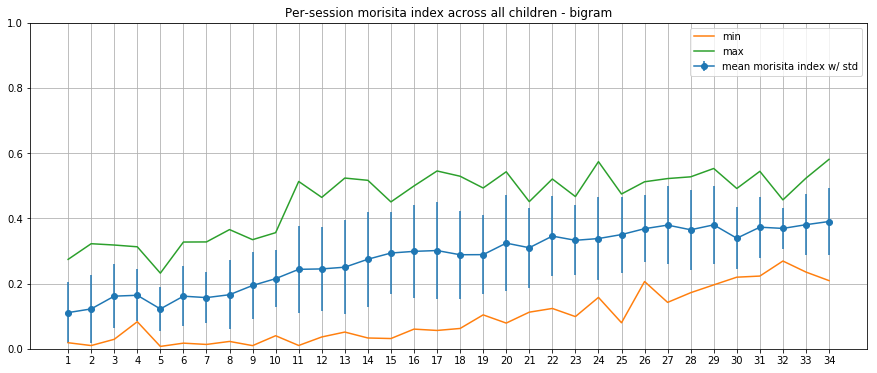

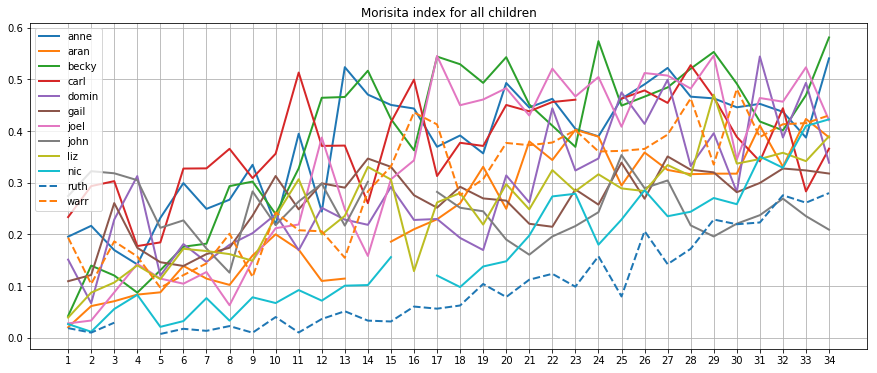

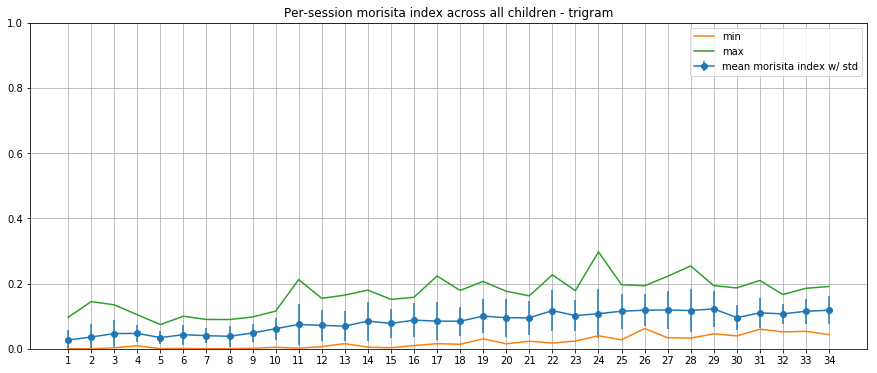

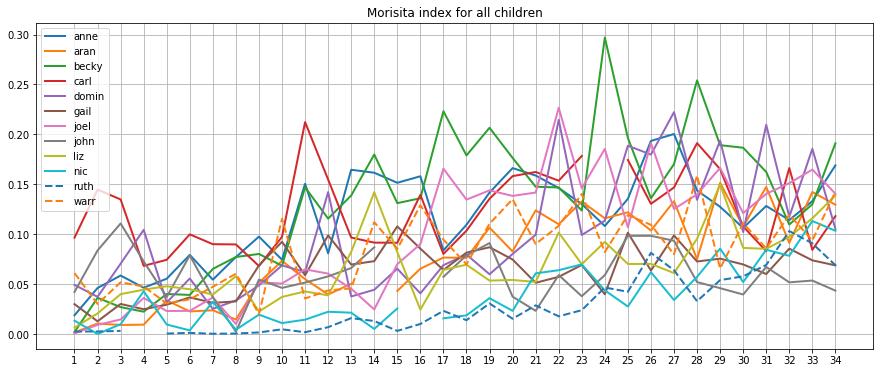

In [63]:
plt.rcParams['figure.figsize'] = 15, 6
def plot_child(df, name, width=2, style='-', title=None, plot=True, ymax=1):
    m = df[df.corpus.eq(name)].groupby(['session']).apply(morisita_child_adult)
    m = m.align(pd.Series(index=np.arange(1, 35)))[0]
    plt.plot(stats.index, m, style, label=name, linewidth=width)
    if plot:
        per_session_plot(title or name)

def plot_all_children_together(df, name):
    children = unigrams.corpus.unique()
    from itertools import cycle, chain, repeat
    styles = cycle(chain(*(repeat(x, 10)
                     for x in '- -- -. :'.split(' '))))
    for index, child in enumerate(children):
        plot_child(df, child, 2, next(styles), plot=False)
    
    plt.legend();
    per_session_plot('Morisita index for all children')

for dataset, name in zip([unigrams, bigrams, trigrams], ['unigram', 'bigram', 'trigram']):
    groups = dataset.groupby(['corpus', 'session']).apply(morisita_child_adult)
    stats = groups.groupby(level='session').describe()
    plt.errorbar(stats.index, stats['mean'], stats['std'], label='mean morisita index w/ std', marker='o');
    plt.plot(stats.index, stats['min'])
    plt.plot(stats.index, stats['max'])
    plt.ylim(0, 1)
    per_session_plot('Per-session morisita index across all children - {}'.format(name))
    plot_all_children_together(dataset, name)

In [ ]:
plt.rcParams['figure.figsize'] = 15, 6

speaker_pairs = combinations(unigrams.corpus.unique(), 2)

groups = pd.DataFrame(
    {corpus1 + ' ' + corpus2: unigrams.groupby(['session']).apply(lambda x: morisita_adult_adult(x, corpus1, corpus2))
        for corpus1, corpus2 in speaker_pairs})

# stats = groups.groupby(level='session').describe()
# plt.errorbar(stats.index, stats['mean'], stats['std'], label='mean morisita index w/ std', marker='o');
# plt.plot(stats.index, stats['min'])
# plt.plot(stats.index, stats['max'])
# plt.ylim(0, 1)
# per_session_plot('Per-session morisita index across all children - {}'.format(name))

<a id='per-child-unigram'></a>
# Per-child plots of Morisita Unigrams

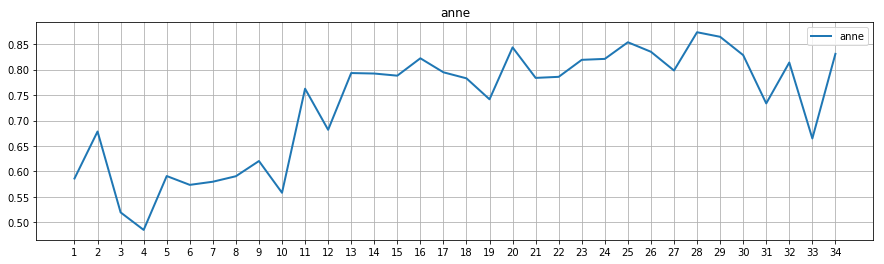

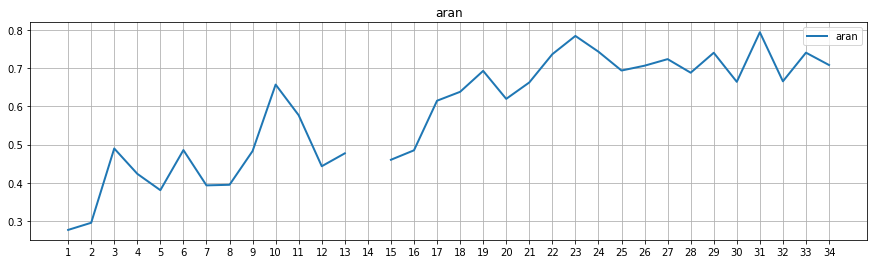

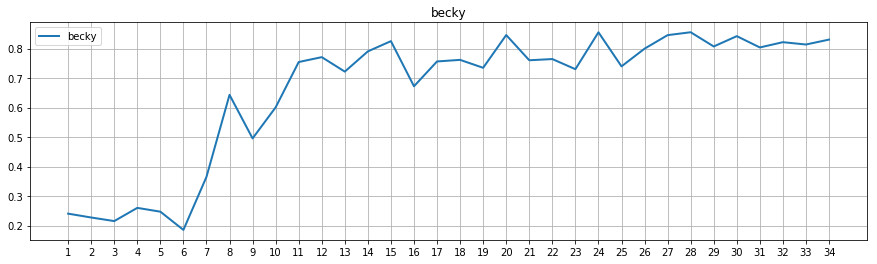

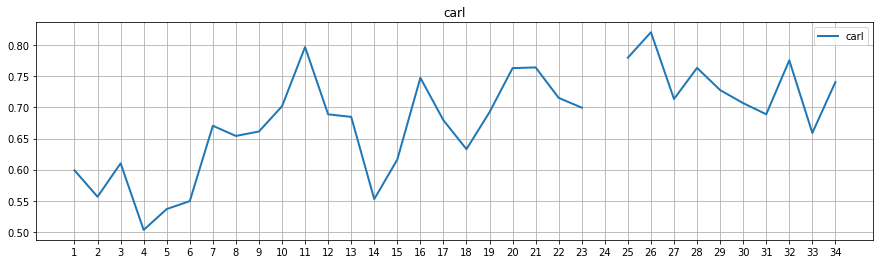

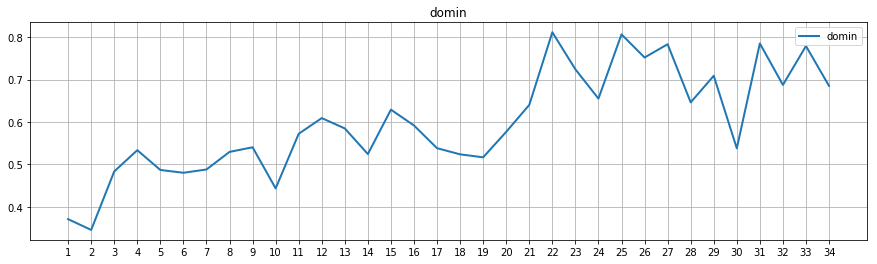

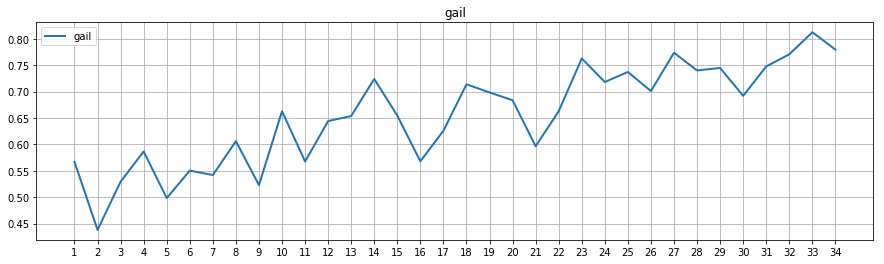

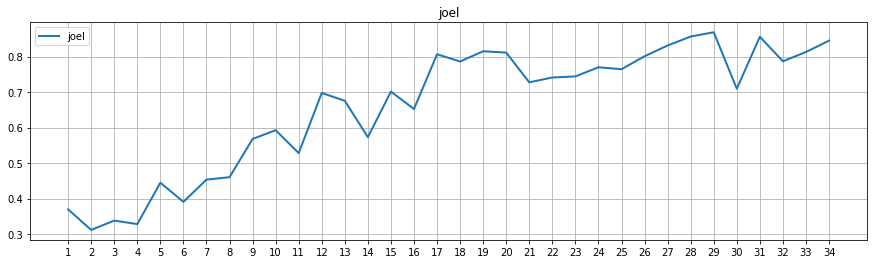

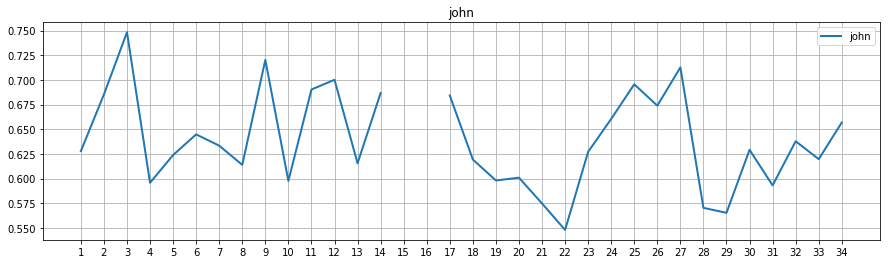

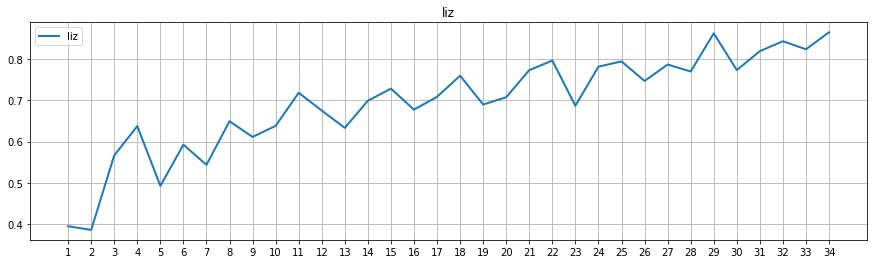

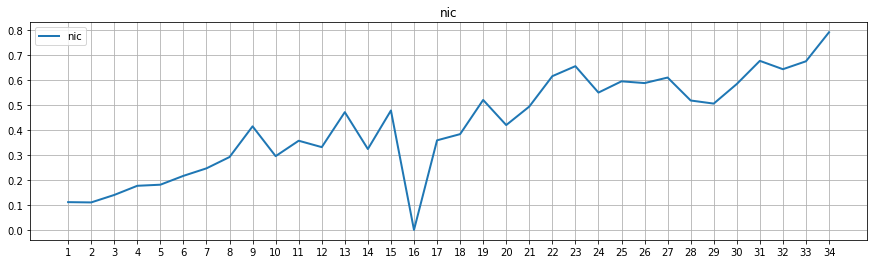

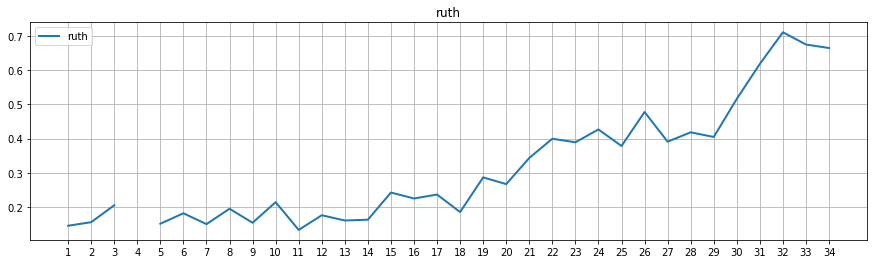

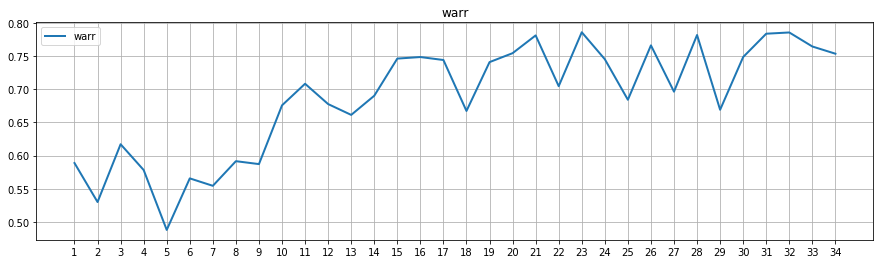

/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


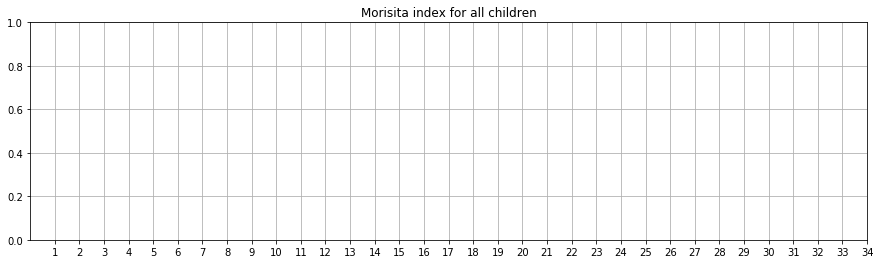

In [19]:
plt.rcParams['figure.figsize'] = 15, 4

children = unigrams.corpus.unique()

for index, child in enumerate(children):
    plot_child(unigrams, child, 2)
plt.legend();

per_session_plot('Morisita index for all children')

<a id='per-child-bigram'></a>
# Per-child plots of Morisita Bigrams

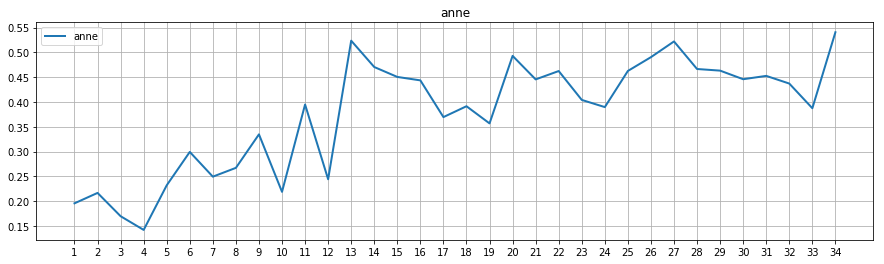

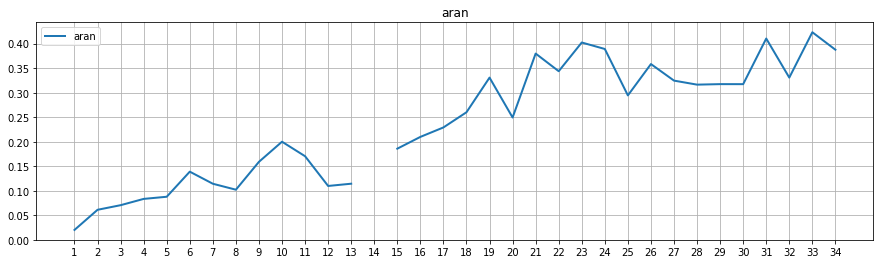

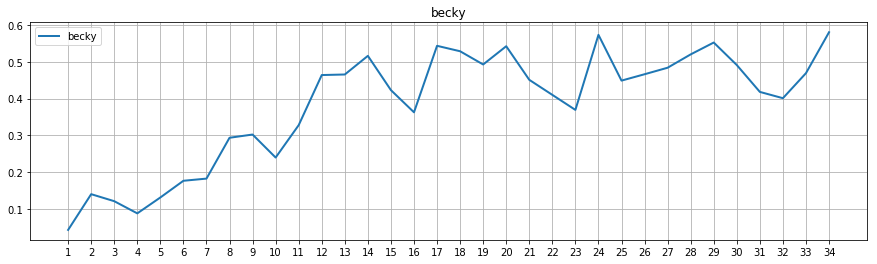

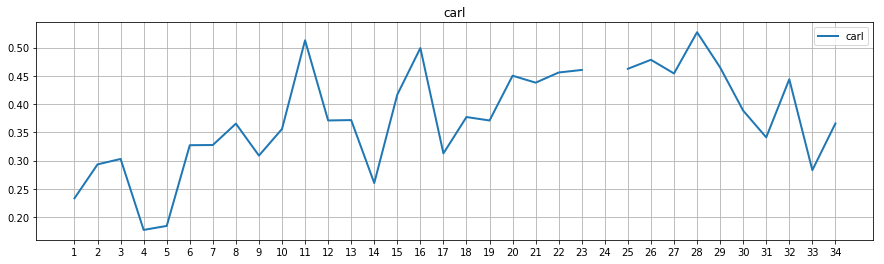

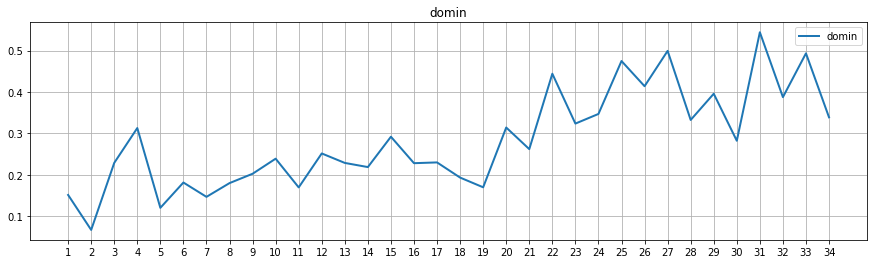

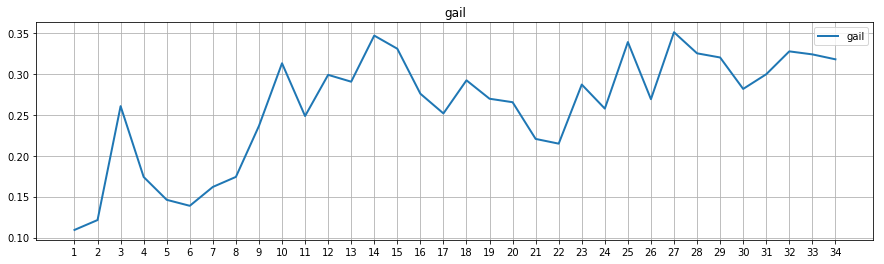

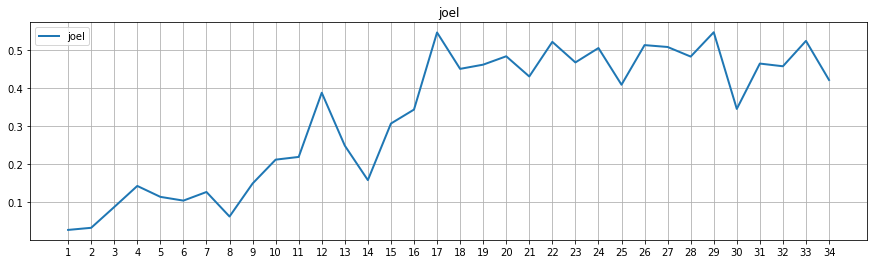

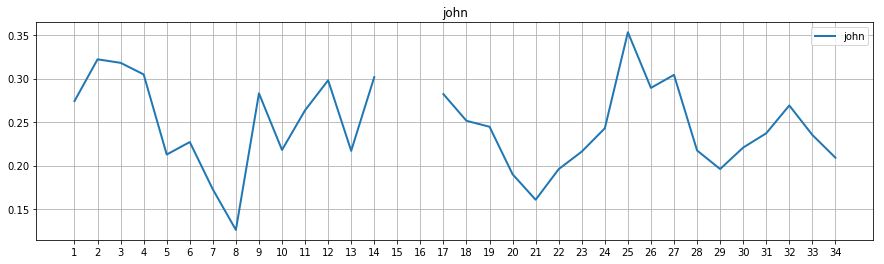

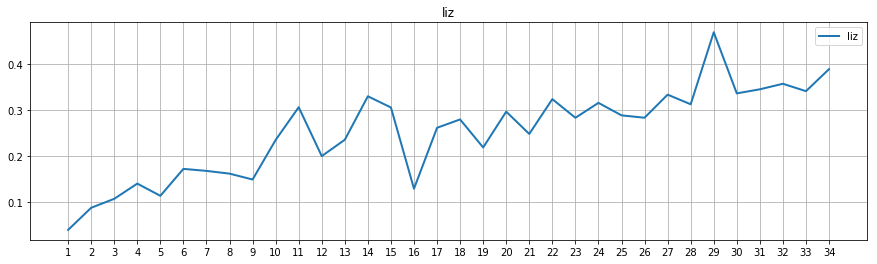

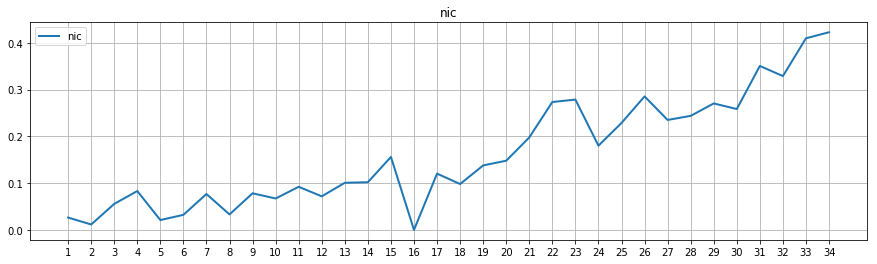

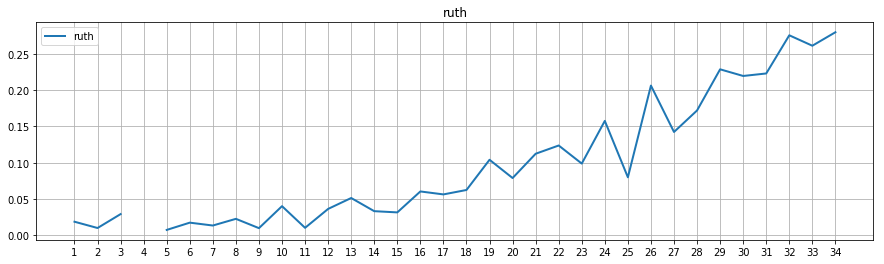

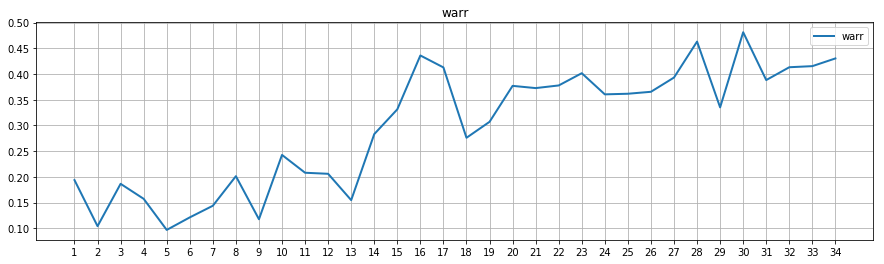

/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


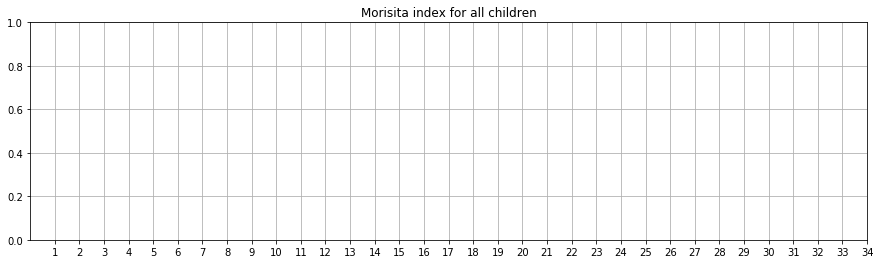

In [23]:
plt.rcParams['figure.figsize'] = 15, 4

children = unigrams.corpus.unique()

for index, child in enumerate(children):
    plot_child(bigrams, child, 2)
plt.legend();

per_session_plot('Morisita index for all children')

<a id='per-child-trigram'></a>
# Per-child plots of Morisita Trigrams

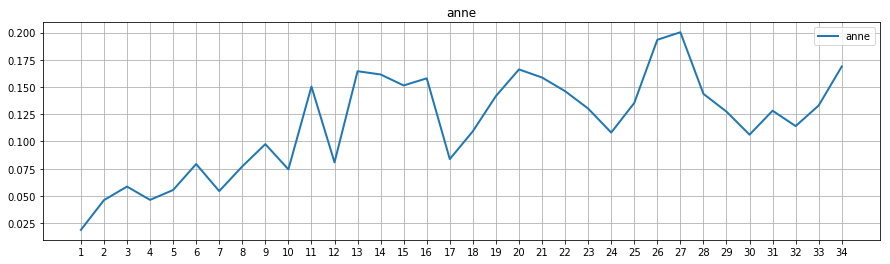

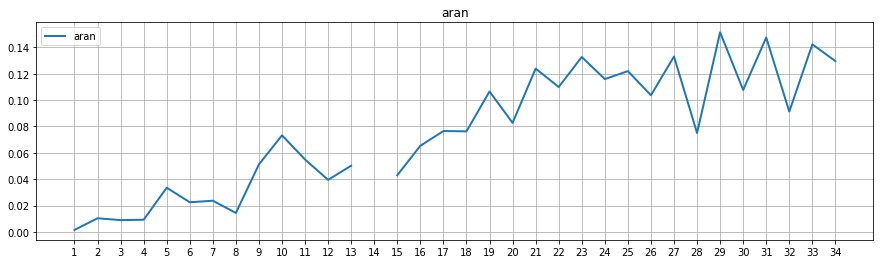

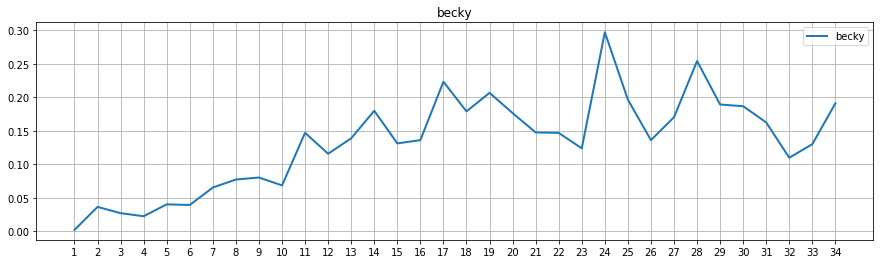

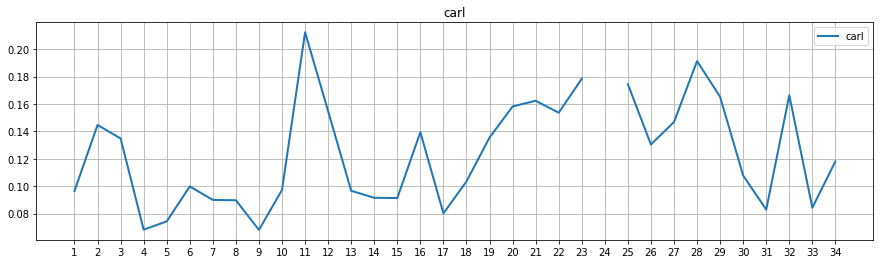

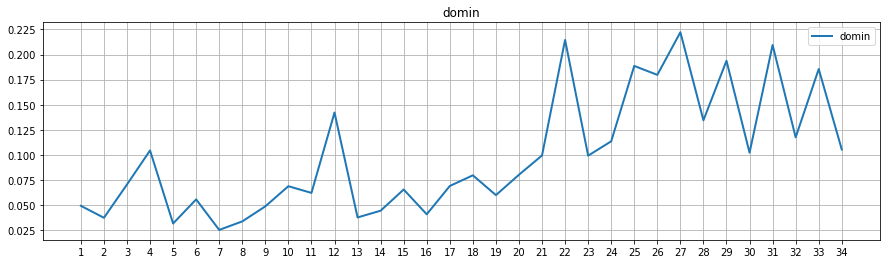

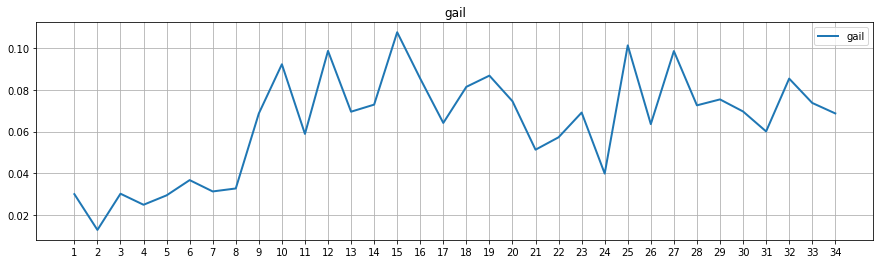

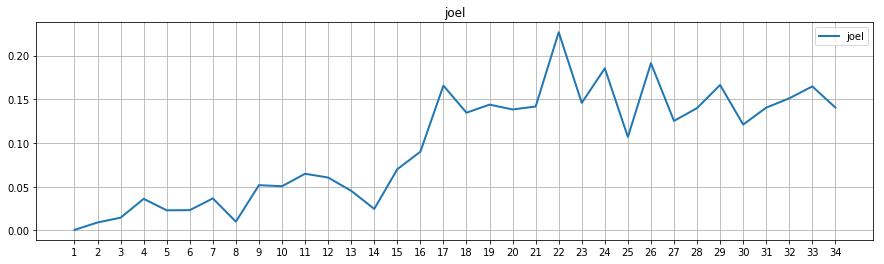

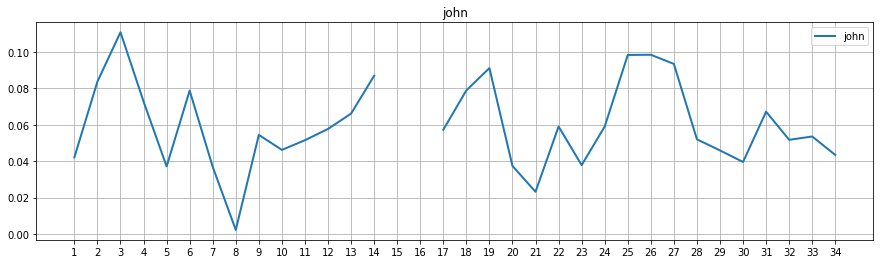

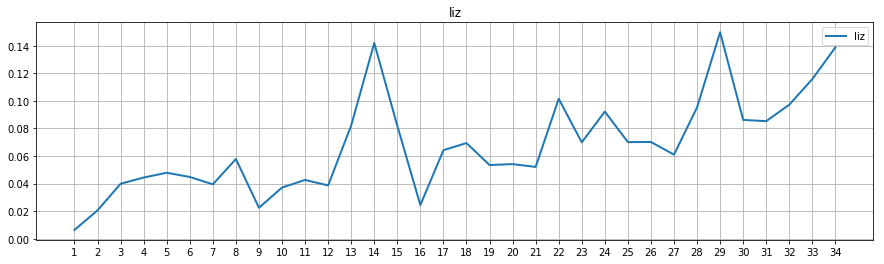

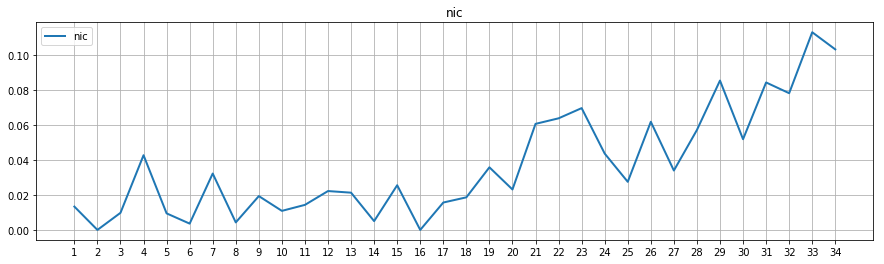

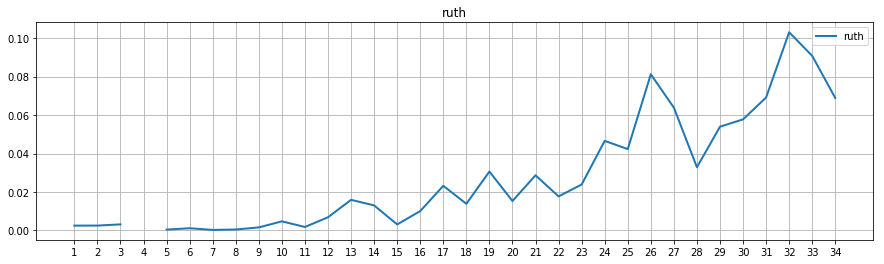

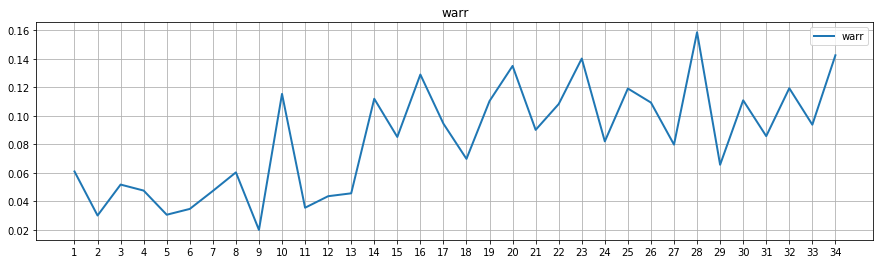

/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


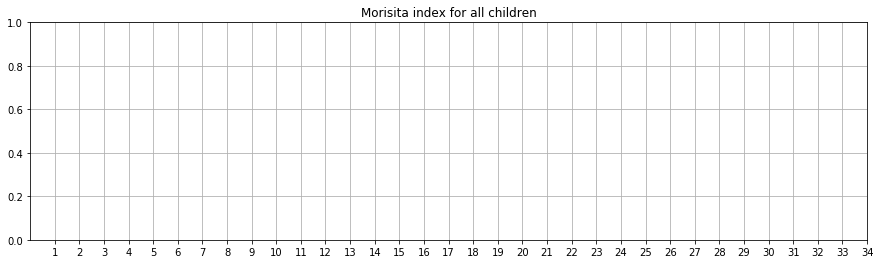

In [22]:
plt.rcParams['figure.figsize'] = 15, 4

children = unigrams.corpus.unique()

for index, child in enumerate(children):
    plot_child(trigrams, child, 2)
plt.legend();

per_session_plot('Morisita index for all children')

<a id='zero-count-ngrams'></a>
# Excluding Zero-count Ngrams

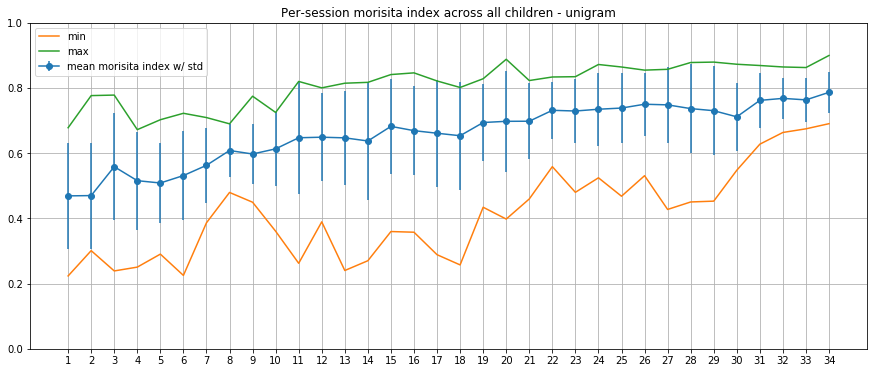

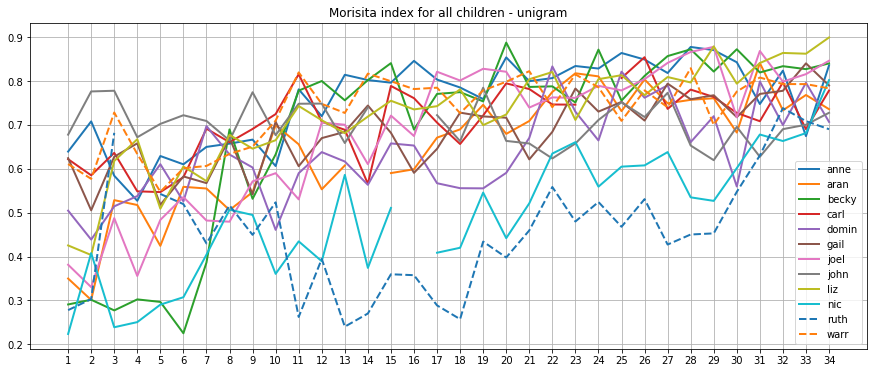

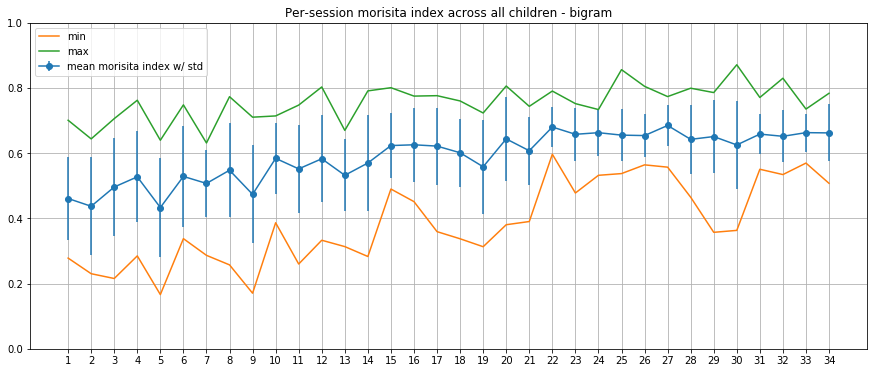

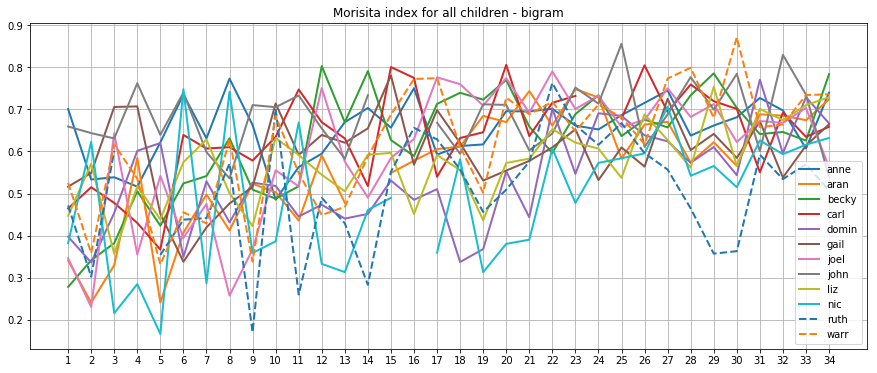

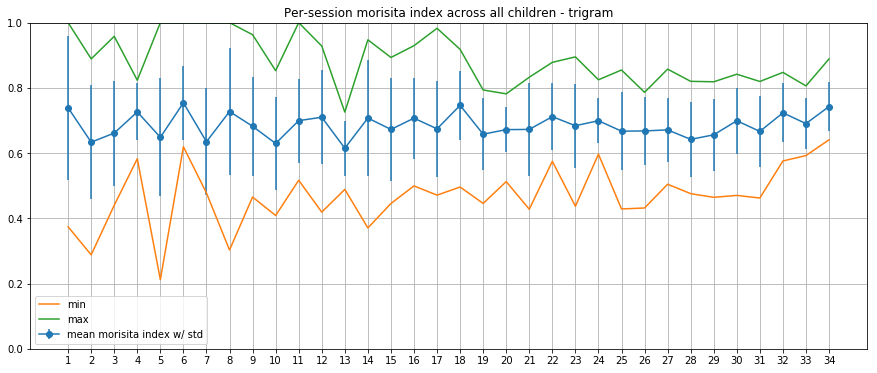

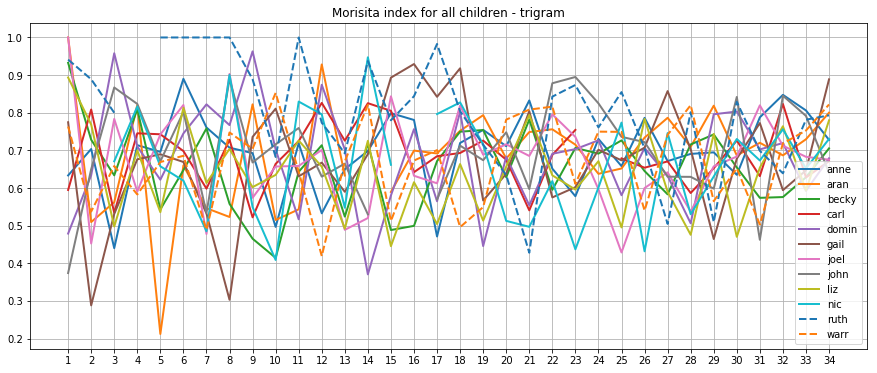

In [96]:
plt.rcParams['figure.figsize'] = 15, 6
def plot_child(df, name, width=2, style='-', title=None, plot=True, ymax=1):
    m = df[df.corpus.eq(name)].groupby(['session']).apply(morisita_child_adult, drop_zeros=True)
    m = m.align(pd.Series(index=np.arange(1, 35)))[0]
    plt.plot(stats.index, m, style, label=name, linewidth=width)
    if plot:
        per_session_plot(title or name)

def plot_all_children_together(df, name):
    children = unigrams.corpus.unique()
    from itertools import cycle, chain, repeat
    styles = cycle(chain(*(repeat(x, 10)
                     for x in '- -- -. :'.split(' '))))
    for index, child in enumerate(children):
        plot_child(df, child, 2, next(styles), plot=False)
    
    plt.legend()
    per_session_plot('Morisita index for all children - {}'.format(name))

for dataset, name in zip([unigrams, bigrams, trigrams], ['unigram', 'bigram', 'trigram']):
    groups = dataset.groupby(['corpus', 'session']).apply(morisita_child_adult, drop_zeros=True)
    stats = groups.groupby(level='session').describe()
    plt.errorbar(stats.index, stats['mean'], stats['std'], label='mean morisita index w/ std', marker='o');
    plt.plot(stats.index, stats['min'])
    plt.plot(stats.index, stats['max'])
    plt.ylim(0, 1)
    per_session_plot('Per-session morisita index across all children - {}'.format(name))
    plot_all_children_together(dataset, name)

# Scratch Area

In [57]:
bigrams.loc[[7, 8]]

,index,filename,uid,speaker,ngram,corpus,session,part
7,7,/home/paul/Downloads/Manchester/anne/anne01a.xml,u5,MOT,it too,anne,1,a
8,8,/home/paul/Downloads/Manchester/anne/anne01a.xml,u5,MOT,too big,anne,1,a


s = bigrams.groupby('corpus')

bigrams.loc[s.groups['anne']]


In [61]:
from itertools import permutations

In [76]:
def pairwise_fun(a, b): 
    return a + '/' + b

[pairwise_fun(x, y)
    for x, y in permutations(unigrams.corpus.unique(), 2)]

['anne/aran',
 'anne/becky',
 'anne/carl',
 'anne/domin',
 'anne/gail',
 'anne/joel',
 'anne/john',
 'anne/liz',
 'anne/nic',
 'anne/ruth',
 'anne/warr',
 'aran/anne',
 'aran/becky',
 'aran/carl',
 'aran/domin',
 'aran/gail',
 'aran/joel',
 'aran/john',
 'aran/liz',
 'aran/nic',
 'aran/ruth',
 'aran/warr',
 'becky/anne',
 'becky/aran',
 'becky/carl',
 'becky/domin',
 'becky/gail',
 'becky/joel',
 'becky/john',
 'becky/liz',
 'becky/nic',
 'becky/ruth',
 'becky/warr',
 'carl/anne',
 'carl/aran',
 'carl/becky',
 'carl/domin',
 'carl/gail',
 'carl/joel',
 'carl/john',
 'carl/liz',
 'carl/nic',
 'carl/ruth',
 'carl/warr',
 'domin/anne',
 'domin/aran',
 'domin/becky',
 'domin/carl',
 'domin/gail',
 'domin/joel',
 'domin/john',
 'domin/liz',
 'domin/nic',
 'domin/ruth',
 'domin/warr',
 'gail/anne',
 'gail/aran',
 'gail/becky',
 'gail/carl',
 'gail/domin',
 'gail/joel',
 'gail/john',
 'gail/liz',
 'gail/nic',
 'gail/ruth',
 'gail/warr',
 'joel/anne',
 'joel/aran',
 'joel/becky',
 'joel/carl',

In [89]:
x = pd.Series([1,2])

In [90]:
def gram_counts(df):
    counts = df.ngram.value_counts()
    return counts / counts.sum()

In [105]:
df = unigrams
adult = df.speaker.eq('MOT')
adult_adult_unigrams = [(corpus1, corpus2, morisita(
        gram_counts(df[adult & df.corpus.eq(corpus1)]),
        gram_counts(df[adult & df.corpus.eq(corpus2)])))
    for corpus1, corpus2 in permutations(unigrams.corpus.unique(), 2)]

In [114]:
df = unigrams
adult = df.speaker.eq('CHI')
child_child_unigrams = [(corpus1, corpus2, morisita(
        gram_counts(df[adult & df.corpus.eq(corpus1)]),
        gram_counts(df[adult & df.corpus.eq(corpus2)])))
    for corpus1, corpus2 in permutations(unigrams.corpus.unique(), 2)]

In [117]:
adult = pd.DataFrame(adult_adult)
child = pd.DataFrame(child_child_unigrams)

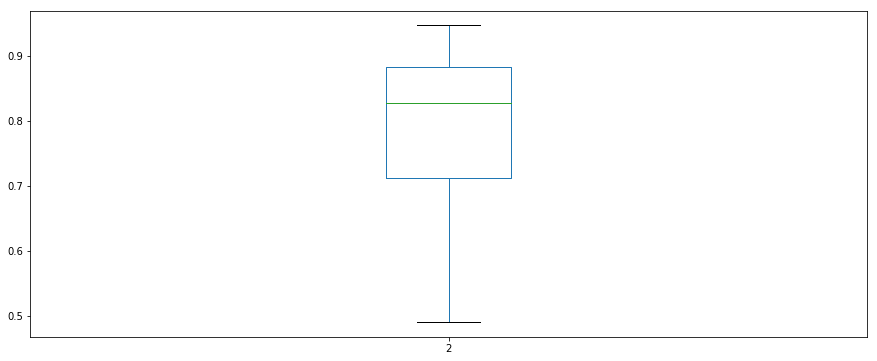

In [118]:
child.plot.box()

In [119]:
child[2].describe()

count    132.000000
mean       0.787346
std        0.124650
min        0.491307
25%        0.711876
50%        0.828465
75%        0.882554
max        0.946950
Name: 2, dtype: float64

In [120]:
adult[2].describe()

count    132.000000
mean       0.939447
std        0.020075
min        0.882474
25%        0.926012
50%        0.941235
75%        0.956509
max        0.968403
Name: 2, dtype: float64